In [ ]:
# 1-Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
from scipy.stats import beta
from scipy.stats import f
from keras.models import Sequential
from keras.layers import Dense
!pip install scikeras
from scikeras.wrappers import KerasClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer-death-rates-by-type.csv to cancer-death-rates-by-type.csv


In [ ]:
data = pd.read_csv('cancer-death-rates-by-type.csv')

In [ ]:
data.head()

,Entity,Code,Year,Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate),...,Deaths - Pancreatic cancer - Sex: Both - Age: Age-standardized (Rate),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)",Deaths - Lip and oral cavity cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Colon and rectum cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Liver cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Larynx cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Ovarian cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Thyroid cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Brain and central nervous system cancer - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,6.486764,7.310613,0.837238,4.285153,4.479875,0.826029,31.988172,...,1.995093,14.069657,1.273888,7.874312,2.611981,11.971836,3.621251,1.045087,0.795176,4.512770
1,Afghanistan,AFG,1991,6.466813,7.288994,0.829514,4.233850,4.468688,0.804741,31.853999,...,1.951962,13.805590,1.257040,7.754987,2.590045,11.900918,3.589414,1.035561,0.789659,4.446988
2,Afghanistan,AFG,1992,6.466158,7.299131,0.821847,4.192670,4.465265,0.785397,31.785219,...,1.906444,13.591141,1.244526,7.652136,2.573065,11.841933,3.570433,1.025213,0.784548,4.413799
3,Afghanistan,AFG,1993,6.479348,7.381653,0.822471,4.166575,4.518657,0.777856,32.059246,...,1.888143,13.422799,1.240243,7.555002,2.578325,11.865807,3.593340,1.023647,0.788610,4.440347
4,Afghanistan,AFG,1994,6.477914,7.473144,0.827221,4.140383,4.600542,0.772456,32.504461,...,1.876670,13.250556,1.236967,7.429222,2.593368,11.919348,3.632985,1.027381,0.796990,4.471324


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 25 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Entity                                                                                       6840 non-null   object 
 1   Code                                                                                         6150 non-null   object 
 2   Year                                                                                         6840 non-null   int64  
 3   Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate)                          6840 non-null   float64
 4   Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate)                            6840 non-null   float64
 5   Deaths - Uterine cancer - Sex: Bot

In [ ]:
data = data.iloc[:, 1:-1]

variables = data.iloc[:, 1:]
labels = data.iloc[:, 0]

In [ ]:
data.describe()

,Year,Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Nasopharynx cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Testicular cancer - Sex: Both - Age: Age-standardized (Rate),...,Deaths - Non-melanoma skin cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Pancreatic cancer - Sex: Both - Age: Age-standardized (Rate),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)",Deaths - Lip and oral cavity cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Colon and rectum cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Liver cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Larynx cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Ovarian cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Thyroid cancer - Sex: Both - Age: Age-standardized (Rate)
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,...,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,2004.500000,10.971163,11.143419,1.644222,3.409531,6.709214,1.995704,13.280728,0.786961,0.182764,...,0.702428,5.608428,22.173528,2.298132,13.299952,2.005945,6.068874,1.794140,2.546739,0.647703
std,8.656074,7.014076,4.088111,0.839118,1.743983,5.349751,1.352481,7.512916,0.849610,0.471489,...,0.354795,3.126273,12.761113,1.748646,6.222012,1.465439,8.166863,0.999805,1.363066,0.314023
min,1990.000000,2.379564,3.537498,0.254159,0.956632,0.704535,0.391774,3.366431,0.098910,0.004655,...,0.189663,1.125122,4.989768,0.560950,3.621139,0.472734,0.645518,0.311429,0.411474,0.036908
25%,1997.000000,6.145465,8.032752,1.079400,2.138188,2.387952,0.913365,8.340951,0.279183,0.071915,...,0.444291,3.013604,11.435857,1.358004,8.171004,1.190599,2.796301,1.086698,1.490251,0.468990
50%,2004.500000,9.717744,10.577197,1.491446,3.010245,5.072539,1.520193,11.572570,0.456909,0.109337,...,0.622225,4.898176,19.916431,1.891091,12.020281,1.522508,3.886513,1.511636,2.189832,0.594872
75%,2012.000000,13.122989,13.717871,2.016718,4.374833,10.212799,2.881694,16.270615,1.018311,0.190325,...,0.867252,8.058965,30.650051,2.624696,17.190284,2.388356,6.615555,2.317227,3.505195,0.758053
max,2019.000000,54.152931,39.243064,6.626412,12.240190,46.158034,7.998508,75.409475,9.633689,7.274967,...,2.594993,21.364770,106.273528,15.480097,38.514601,18.759678,130.675113,7.169254,8.097769,3.282715


In [ ]:
# For illustration purposes
data_visualization = data.iloc[:, [0, 1, 2, 3, 4, 13, 20, 21, 22]]

/tmp/ipython-input-2257321789.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


[Text(0, 0, 'Year'),
 Text(1, 0, 'Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate)'),
 Text(2, 0, 'Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate)'),
 Text(3, 0, 'Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate)'),
 Text(4, 0, 'Deaths - Non-melanoma skin cancer - Sex: Both - Age: Age-standardized (Rate)'),
 Text(5, 0, 'Deaths - Larynx cancer - Sex: Both - Age: Age-standardized (Rate)'),
 Text(6, 0, 'Deaths - Ovarian cancer - Sex: Both - Age: Age-standardized (Rate)'),
 Text(7, 0, 'Deaths - Thyroid cancer - Sex: Both - Age: Age-standardized (Rate)')]

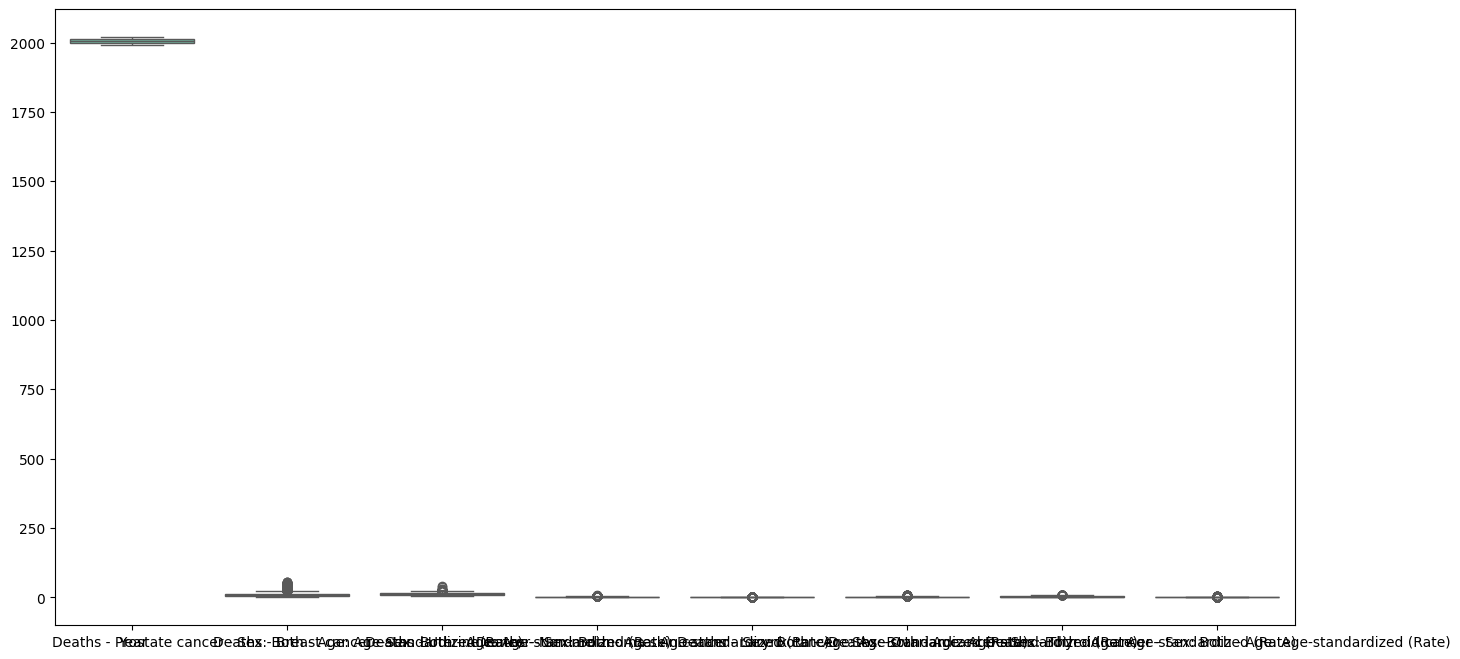

In [ ]:
# Visualisation of the data using a box plot
fig=plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.boxplot(data=data_visualization, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

In [ ]:
# outlier detection
Q1 = variables.quantile(0.25)
Q3 = variables.quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

print('Lower Whisker:')
print(Lower_Whisker)
print('\n\n\nUpperWhisker:')
print(Upper_Whisker)

Lower_outliers = variables < Lower_Whisker
Upper_outliers = variables > Upper_Whisker

Lower_outliers_index = Lower_outliers.any(axis=1)
Upper_outliers_index = Upper_outliers.any(axis=1)

Lower Whisker:
Year                                                                                        1974.500000
Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate)                           -4.320821
Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate)                             -0.494926
Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate)                            -0.326578
Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate)                            -1.216779
Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate)                           -9.349318
Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate)                             -2.039129
Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate)                            -3.553545
Deaths - Nasopharynx cancer - Sex: Both - Age: Age-standardized (Rate)                        -0.829508
Deaths - Testicular cancer - Sex: Both - Age: Age

In [ ]:
print(f'There are {sum(Lower_outliers_index)} points below the lower whisker')
print(f'There are {sum(Upper_outliers_index)} points above the upper whisker')

There are 0 points below the lower whisker
There are 3443 points above the upper whisker


In [ ]:
variables.skew()

,0
Year,0.000000
Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate),2.004100
Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate),0.684614
Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate),1.188084
Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate),1.338127
Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate),1.884626
Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate),1.148394
Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate),2.324306
Deaths - Nasopharynx cancer - Sex: Both - Age: Age-standardized (Rate),3.656740
Deaths - Testicular cancer - Sex: Both - Age: Age-standardized (Rate),12.823703


In [ ]:
median = variables.median()
variables = variables.where((variables >= Lower_Whisker) & (variables <= Upper_Whisker), median, axis=1)

In [ ]:
variables.skew()

,0
Year,0.000000
Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate),0.618476
Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate),0.511334
Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate),0.614132
Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate),0.643940
Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate),0.862822
Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate),0.986512
Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate),0.757783
Deaths - Nasopharynx cancer - Sex: Both - Age: Age-standardized (Rate),1.305717
Deaths - Testicular cancer - Sex: Both - Age: Age-standardized (Rate),1.034666


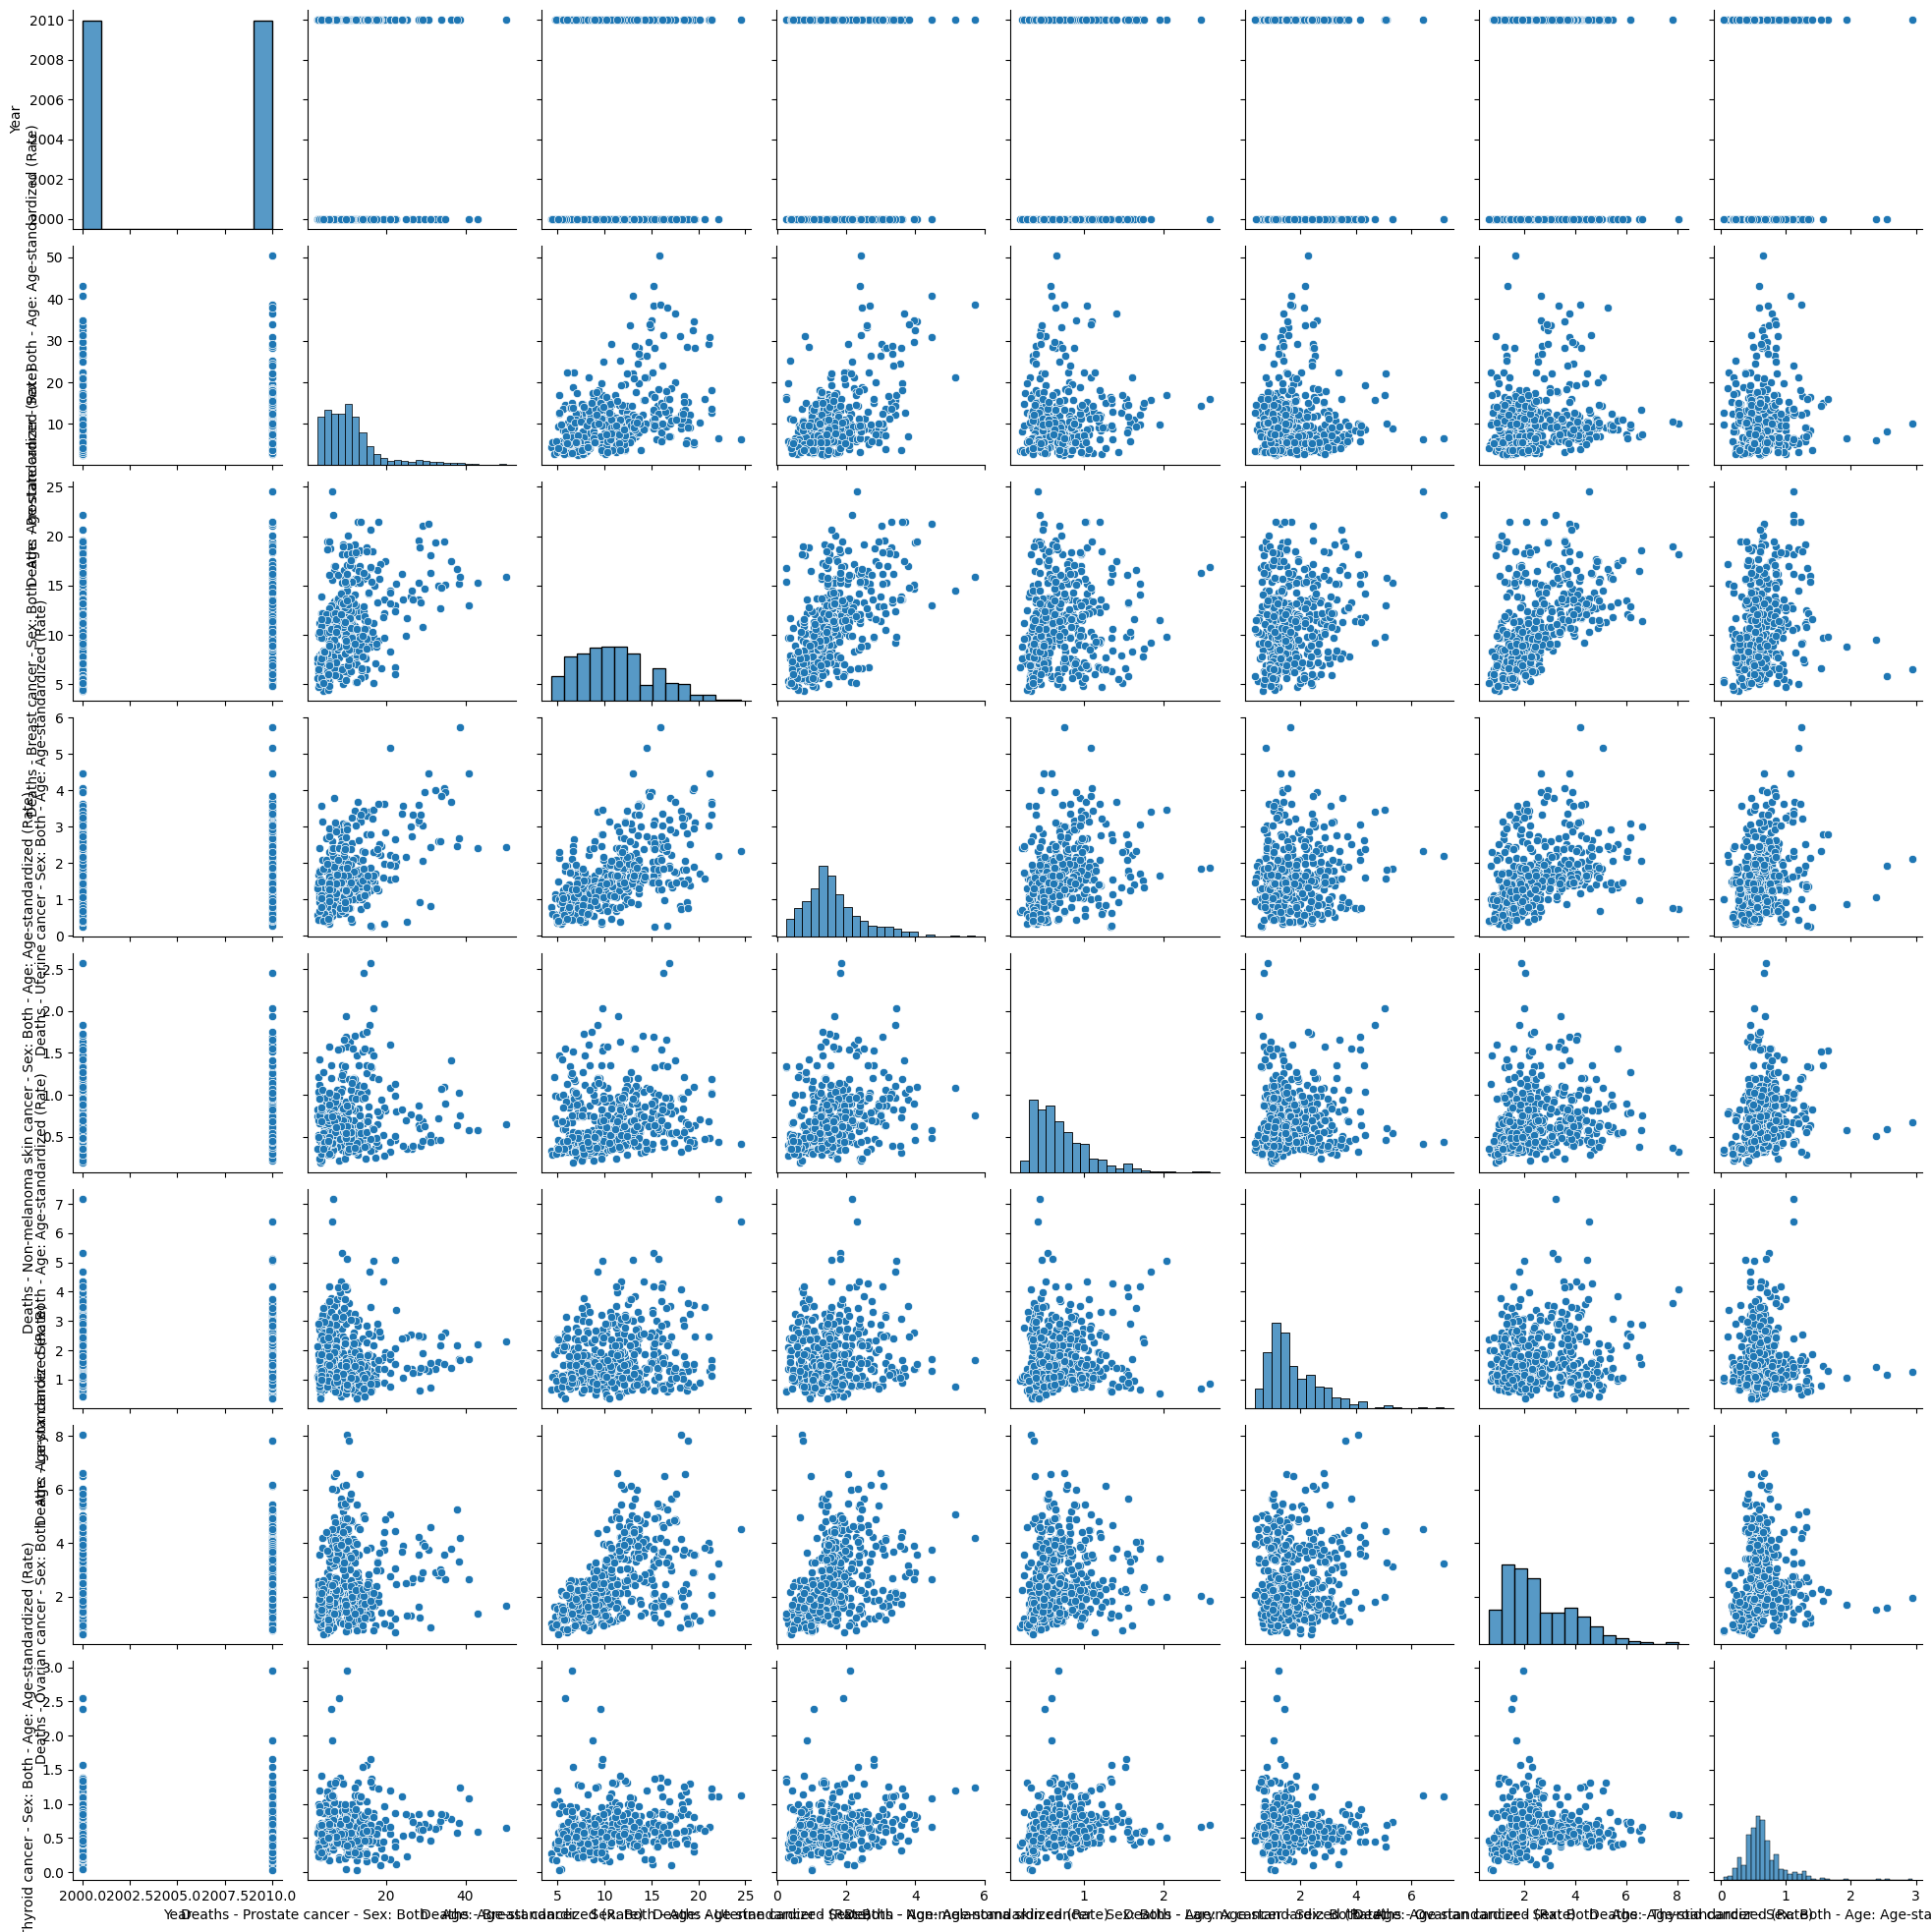

In [ ]:
tahun_pilihan = [2000, 2010, 2020]
data_filtered = data_visualization[data_visualization['Year'].isin(tahun_pilihan)]

sns.pairplot(data_filtered)
plt.show()

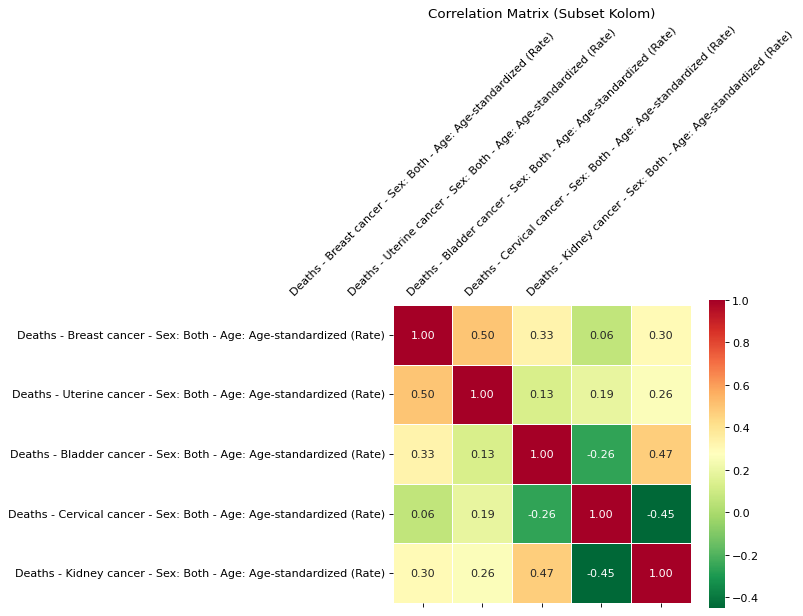

In [ ]:
# ambil 5 kolom pertama setelah 'Code' dan 'Year'
selected_cols = variables.columns[2:7]

correlation = variables[selected_cols].corr('pearson')

plt.figure(figsize=(6,5), dpi=80)
ax = sns.heatmap(
    correlation.round(2),
    cmap='RdYlGn_r',
    linewidths=0.5,
    annot=True,
    cbar=True,
    square=True,
    fmt='0.2f'
)

plt.yticks(rotation=0)
ax.tick_params(labelbottom=False, labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Correlation Matrix (Subset Kolom)')
plt.show()


In [ ]:
labels_encoder_response = LabelEncoder()
labels = labels_encoder_response.fit_transform(labels)

In [ ]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(variables, labels, test_size=0.2, random_state=0)

# standardization
sc_training = StandardScaler()
X_train = sc_training.fit_transform(X_train)
X_test = sc_training.transform(X_test)

# Principal component analysis
pca = PCA()
Z_train = pca.fit_transform(X_train)
Z_test = pca.transform(X_test)

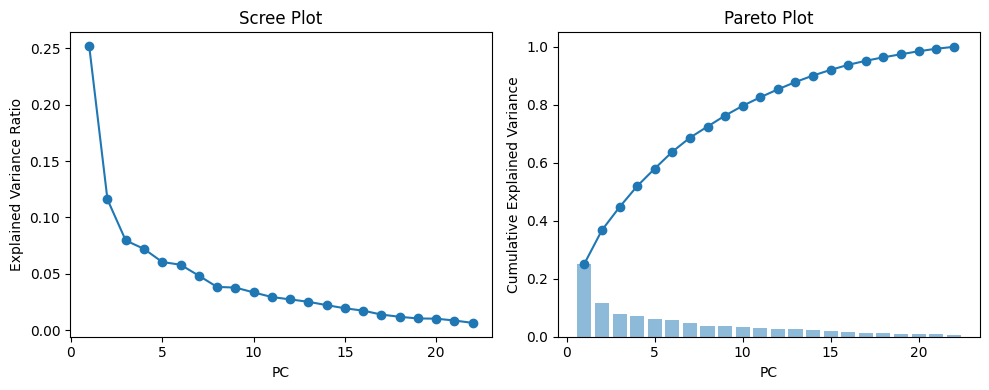

In [ ]:
eigen = pca.explained_variance_
ratio = pca.explained_variance_ratio_
components = np.arange(1, len(eigen) + 1)

plt.figure(figsize=(10,4))

# Scree plot
plt.subplot(1,2,1)
plt.plot(components, ratio, marker='o')
plt.title("Scree Plot")
plt.xlabel("PC")
plt.ylabel("Explained Variance Ratio")

# Pareto plot
plt.subplot(1,2,2)
plt.bar(components, ratio, alpha=0.5)
plt.plot(components, np.cumsum(ratio), marker='o')
plt.title("Pareto Plot")
plt.xlabel("PC")
plt.ylabel("Cumulative Explained Variance")

plt.tight_layout()
plt.show()


In [ ]:
Z_train = Z_train[:, :NUMBER_OF_PCs]
Z_test = Z_test[:, :NUMBER_OF_PCs]

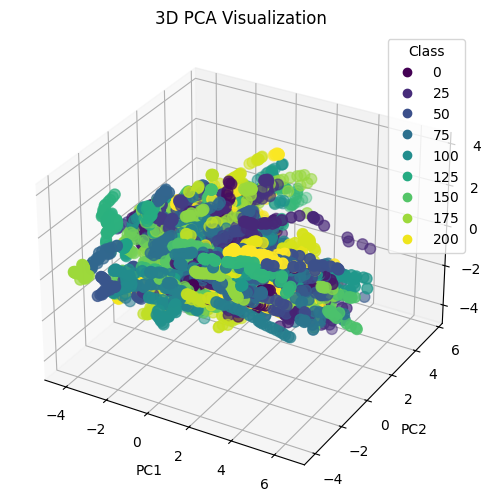

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# ambil 3 komponen pertama
Z3 = Z_train[:, :3]   # PC1, PC2, PC3

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    Z3[:, 0],
    Z3[:, 1],
    Z3[:, 2],
    c=y_train,
    s=60
)

ax.set_title('3D PCA Visualization')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# legend kelas otomatis
ax.legend(*scatter.legend_elements(), title="Class")

plt.show()
